<a href="https://colab.research.google.com/github/Kvaathe/AAMD/blob/main/lectura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
import struct

Carga el fichero directamente desde el directorio de GitHub

In [19]:
url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/day.csv"

In [20]:
dataset = read_csv(url)

Se puede ver en el fichero que no hay datos olvidados, pero es mucho más rápido con la función .isnull(). Como se puede apreciar a continuación, todos los datos han sido rellenados.

In [57]:
print("Missing values: ", dataset.isnull().sum().sum())
print(dataset.isnull().any())

Missing values:  0
instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


La función .shape muestra el número de filas y columnas del dataset.

In [22]:
print(dataset.shape)

(731, 16)


La función .head() muestra las primeras 3 instancias del dataset.

In [23]:
print(dataset.head(3))

   instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0        1  2011-01-01       1   0  ...   0.160446     331         654   985
1        2  2011-01-02       1   0  ...   0.248539     131         670   801
2        3  2011-01-03       1   0  ...   0.248309     120        1229  1349

[3 rows x 16 columns]


A continuación, se muestra una descripción de todas las columnas del dataset.

In [24]:
print(dataset.describe())

          instant      season  ...   registered          cnt
count  731.000000  731.000000  ...   731.000000   731.000000
mean   366.000000    2.496580  ...  3656.172367  4504.348837
std    211.165812    1.110807  ...  1560.256377  1937.211452
min      1.000000    1.000000  ...    20.000000    22.000000
25%    183.500000    2.000000  ...  2497.000000  3152.000000
50%    366.000000    3.000000  ...  3662.000000  4548.000000
75%    548.500000    3.000000  ...  4776.500000  5956.000000
max    731.000000    4.000000  ...  6946.000000  8714.000000

[8 rows x 15 columns]


La función .groupby() agrupa los datos según la columna que se le indica y .size() cuenta cuantas instancias hay de cada.

In [25]:
print(dataset.groupby('cnt').size())

cnt
22      1
431     1
441     1
506     1
605     1
       ..
8294    1
8362    1
8395    1
8555    1
8714    1
Length: 696, dtype: int64


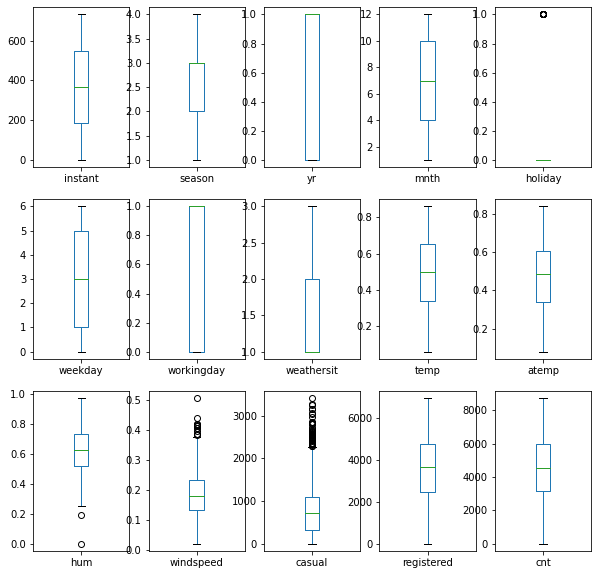

In [26]:
dataset.plot(kind='box',subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(10,10))
pyplot.show()

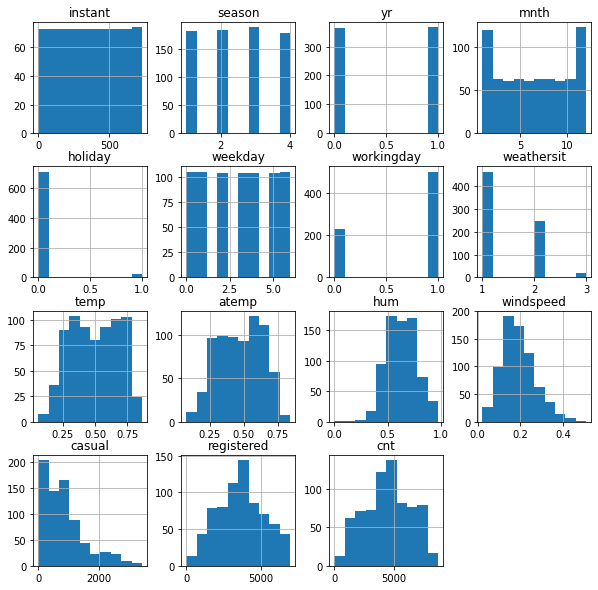

In [27]:
dataset.hist(figsize=(10,10))
pyplot.show()

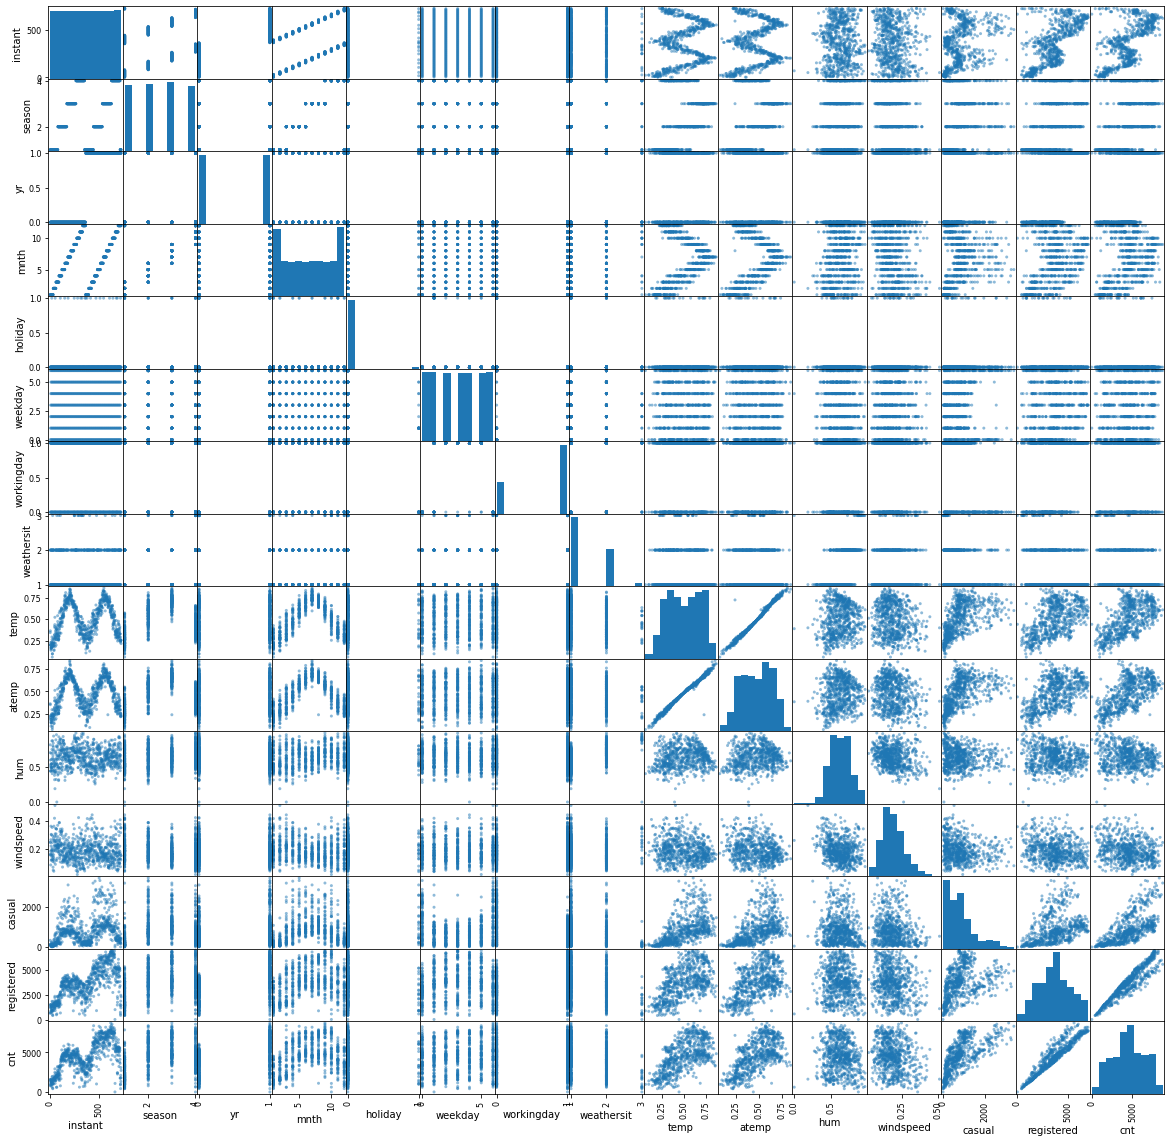

In [28]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

In [39]:
array = dataset.values
X = array[:,0:15]
y = array[:,15]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)

In [40]:
print(X_train)
print(len(X_train))

[[522 '2012-06-05' 2 ... 0.209575 968 6033]
 [148 '2011-05-28' 2 ... 0.23009200000000002 2001 2757]
 [473 '2012-04-17' 2 ... 0.273629 989 5702]
 ...
 [73 '2011-03-14' 1 ... 0.136926 359 1687]
 [236 '2011-08-24' 3 ... 0.253108 949 4181]
 [38 '2011-02-07' 1 ... 0.045408300000000006 120 1592]]
548


In [41]:
print(X_validation)
print(len(X_train))

[[405 '2012-02-09' 1 ... 0.194037 163 3667]
 [727 '2012-12-27' 1 ... 0.35013299999999997 247 1867]
 [160 '2011-06-09' 2 ... 0.149883 563 3352]
 ...
 [12 '2011-01-12' 1 ... 0.304627 25 1137]
 [89 '2011-03-30' 2 ... 0.17288800000000001 168 1368]
 [520 '2012-06-03' 2 ... 0.184087 2494 5147]]
548


In [42]:
print(Y_train)

[7001 4758 6691 7393 3867 2429 7582 6917 5698 4790 4401 1635 1360 7534
 4484 1951 2802 6457 22 3214 3872 4996 5905 7665 2808 7350 3940 2659 6664
 3641 3068 1944 3624 7109 6169 4911 6779 2913 3958 6153 4639 4109 6824
 1301 4127 3894 2227 2710 7605 1096 5566 4763 3623 6786 3613 4205 5191
 6304 7499 2999 4586 4549 7446 5260 7040 3267 4186 4679 4579 5557 7498
 5180 5585 2703 6230 1321 5008 3053 6685 5225 7421 6778 5464 1606 5302
 6904 6436 4539 4068 6883 4990 1530 6869 4046 6530 4460 1891 4433 1605
 1600 1550 5633 5409 2895 6978 7403 3542 2832 4339 7534 6536 4521 6133
 4629 6235 7058 4274 4220 5582 6359 4332 3959 2471 8395 1472 3409 3425
 8090 1842 6889 3129 3520 4258 6421 4669 5740 5687 3372 5026 4833 7055
 6140 6234 5698 3974 7720 2162 1450 6734 3598 2493 1471 7216 4362 4708
 4189 6879 6196 2660 6598 4274 8555 1510 5010 6053 4661 5936 1446 3873
 5532 7375 3285 5495 2416 3487 1349 4585 4270 4294 1162 2115 4649 3820
 1650 5119 4694 4195 4725 5810 6660 2792 4563 5992 5501 6290 6233 3115
 48

In [45]:
model = KNeighborsClassifier(n_neighbors=1)

for i in range(len(X_train[:,1])):
  X_train[i,1] = X_train[i,1].replace("-", "")

for j in range(len(X_validation[:,1])):
  X_validation[j,1] = X_validation[j,1].replace("-", "")

for n in range(len(Y_train)):
    Y_train[n] = bin(Y_train[n])

print(X_train)
print(Y_train)

[[522 '20120605' 2 ... 0.209575 968 6033]
 [148 '20110528' 2 ... 0.23009200000000002 2001 2757]
 [473 '20120417' 2 ... 0.273629 989 5702]
 ...
 [73 '20110314' 1 ... 0.136926 359 1687]
 [236 '20110824' 3 ... 0.253108 949 4181]
 [38 '20110207' 1 ... 0.045408300000000006 120 1592]]
['0b1101101011001' '0b1001010010110' '0b1101000100011' '0b1110011100001'
 '0b111100011011' '0b100101111101' '0b1110110011110' '0b1101100000101'
 '0b1011001000010' '0b1001010110110' '0b1000100110001' '0b11001100011'
 '0b10101010000' '0b1110101101110' '0b1000110000100' '0b11110011111'
 '0b101011110010' '0b1100100111001' '0b10110' '0b110010001110'
 '0b111100100000' '0b1001110000100' '0b1011100010001' '0b1110111110001'
 '0b101011111000' '0b1110010110110' '0b111101100100' '0b101001100011'
 '0b1101000001000' '0b111000111001' '0b101111111100' '0b11110011000'
 '0b111000101000' '0b1101111000101' '0b1100000011001' '0b1001100101111'
 '0b1101001111011' '0b101101100001' '0b111101110110' '0b1100000001001'
 '0b1001000011111' 

In [46]:
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(X_validation)

[[405 '20120209' 1 ... 0.194037 163 3667]
 [727 '20121227' 1 ... 0.35013299999999997 247 1867]
 [160 '20110609' 2 ... 0.149883 563 3352]
 ...
 [12 '20110112' 1 ... 0.304627 25 1137]
 [89 '20110330' 2 ... 0.17288800000000001 168 1368]
 [520 '20120603' 2 ... 0.184087 2494 5147]]


In [47]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [48]:
print(Y_validation)
print(len(Y_validation))

[3830 2114 3915 4322 6591 5204 5323 3351 3068 4972 3351 1977 822 2485 7736
 2368 5515 6572 4511 4359 1851 7335 4758 2689 4966 4118 6824 4375 3389
 2475 754 3523 1683 1749 6241 4570 1416 3368 6591 4023 4553 7424 4840 5728
 5202 4717 7338 4035 2277 4866 2034 7693 3403 1812 4304 2947 1969 7006
 4656 1927 2376 2134 5084 2121 4154 8294 4592 5319 1685 3204 7261 6825
 5035 1562 7444 7415 7765 4507 1872 3310 4826 3376 7570 2402 5267 3659
 3126 4150 6864 3574 1005 5058 5138 5342 3005 1746 1000 6891 4665 1341
 3577 985 4367 5047 6192 2192 2594 2169 2133 2302 4058 3644 2425 3740 4788
 4509 7458 5538 4066 7273 2496 3761 6597 1693 2918 3322 1421 3333 5478
 4905 3249 8362 7592 4630 3785 5847 627 6203 4105 3190 2739 5087 5686 5611
 1538 5382 623 3239 4459 7836 4917 7282 8173 4595 7466 3194 1708 3784 7494
 1013 6536 6569 5312 1865 3727 2177 5362 3429 683 3292 4195 3422 3387 5409
 3750 1977 1815 7509 5336 2311 1162 1536 7641]
183


In [56]:
#for x in range(len(Y_validation)):
    #Y_validation[x] = bin(Y_validation[x])
print(accuracy_score(Y_validation, predictions))


0.00546448087431694


In [50]:
print(model.predict([[733, 20130101, 1, 1, 12, 0, 1, 1, 2, 0.215833, 0.223487, 0.5775, 0.154846, 439, 2290]]))
print(" ", bin(y[-1]))
print(model.predict([[734, 20130102, 1, 1, 12, 0, 0, 0, 1, 0.255833, 	0.2317, 0.483333, 0.350754, 364, 1432]]))
print(" ", bin(y[-2]))

print(model.predict([[735, 20130103, 1, 1, 12, 0, 6, 0, 2, 0.253333, 	0.2424, 0.752917, 0.124383, 59, 1182]]))
print(" ", bin(y[14]))

['0b101010101001']
  0b101010101001
['0b11100000100']
  0b11100000100
['0b11100000100']
  0b10011100000
